In [44]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [46]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [47]:
# How much heavier the age group with the highest average weight than the age group with the lowest weight?
agg1 = diabetes_dataset.groupby('Age').agg(['mean','count','sum'])['BMI'].sort_values('mean').reset_index()

# diff = agg1['mean'][len(agg1)-1]-agg1['mean'][0]
# print(diff)
# print(agg1['mean'][0])
# print(round((diff/agg1['mean'][0])*100,4)," %")

avg_bp = diabetes_dataset.groupby('Age').agg({'BMI':'mean'})
avg_bp1 = diabetes_dataset.groupby('Age').agg(['mean','size','count'])['BMI'].sort_values('mean').reset_index()
diff = (avg_bp1.max() / avg_bp1.min() - 1) 
diff
# print(avg_bp1.max())
# diff
# avg_bp1


Age       2.857143
mean      1.753157
size     71.000000
count    71.000000
dtype: float64

In [48]:
# Do people over 50 have higher cholesterol levels than the rest?
avg_glucose = diabetes_dataset.groupby('Age').agg({'Glucose':'mean'})
diff2 = avg_glucose[avg_glucose.index > 50].mean() / avg_glucose[avg_glucose.index <= 50].mean() - 1
diff2


Glucose    0.10778
dtype: float64

In [49]:
less_50 = diabetes_dataset.groupby('Age').agg('mean')['Glucose'].reset_index().query('Age < 50').mean()
more_50 = diabetes_dataset.groupby('Age').agg('mean')['Glucose'].reset_index().query('Age >= 50').mean()
print(less_50)
print(more_50)

Age         35.000000
Glucose    122.437945
dtype: float64
Age         61.434783
Glucose    136.306573
dtype: float64


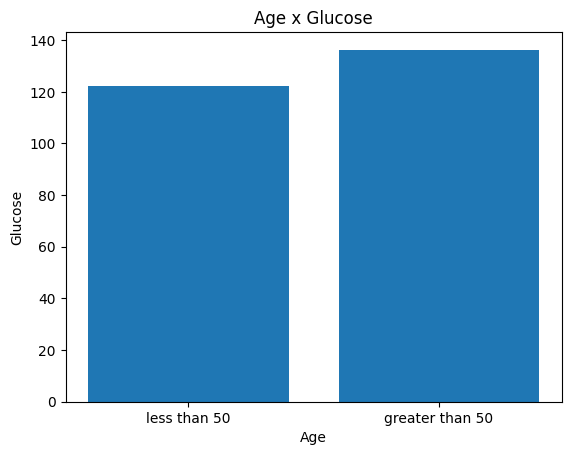

In [50]:
ax = plt.bar(['less than 50','greater than 50'],[less_50['Glucose'],more_50['Glucose']])
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age x Glucose')
plt.show()

In [51]:
less_50 < more_50

Age        True
Glucose    True
dtype: bool

In [52]:
# Are men more likely to be a high bp than women?
pg_avg = diabetes_dataset.groupby('Outcome').agg(['sum'])['BloodPressure']
pg_avg




,sum
Outcome,
0,34092
1,18981


In [53]:
#How tall are the tallest 1% of people?
diabetes_dataset['BMI'].quantile(0.99)

50.75900000000009

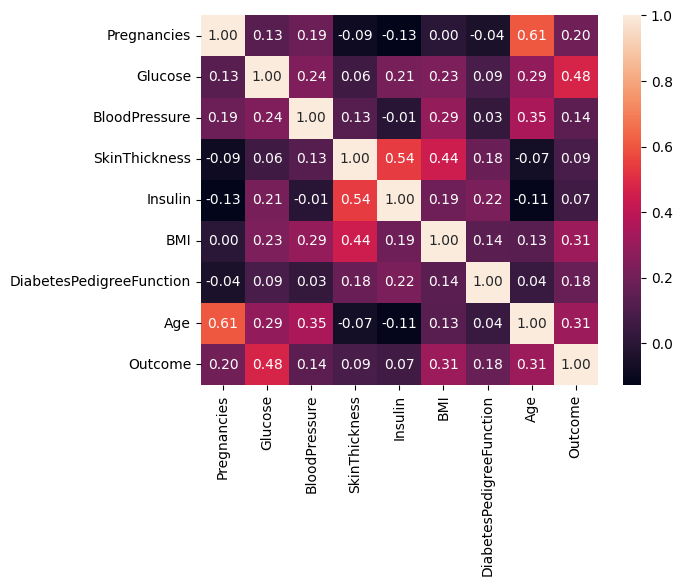

In [54]:
#Which two features have the highest spearman rank correlation?
sns.heatmap(diabetes_dataset.corr(method='spearman'),annot=True,fmt='.2f')
plt.show()

In [55]:
#What percentage of people are more than 2 standard deviations far from the average height
mean_bp = diabetes_dataset['BloodPressure'].mean()
std_bp = diabetes_dataset['BloodPressure'].std()

pop_with_dev = len(diabetes_dataset[abs(diabetes_dataset['BloodPressure'] - mean_bp) > 2*std_bp])
total_pop = len(diabetes_dataset)

pop_with_dev/total_pop * 100


5.859375

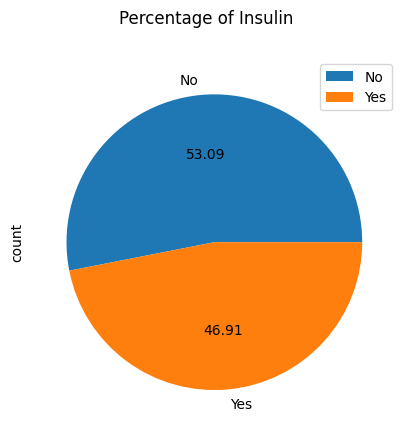

In [56]:
# What percentage of the population over 50 years old consume alcohol? Ignore those persons, where we have no alcohol sonsumption information
# %%time
dx = diabetes_dataset.query('Age > 50').groupby('Outcome').agg(['count'])['Insulin'].plot(kind='pie',labels=['No','Yes'],subplots=True,autopct="%.2f",title='Percentage of Insulin')

In [57]:
#8. Which of the following statements is true with 95% confidence?¶
# ⚪Smokers have higher blood presure than non-smokers¶
# ⚪Smokers have higher cholesterol level than non-smokers¶
# ⚪Smokers weight less than non smokers
# ⚪Men have higher blood pressure than women¶


In [58]:
# Smokers have higher blood presure than non-smokers¶
diabetes_dataset['avg_bp2'] = diabetes_dataset['BloodPressure']
grp_bp = diabetes_dataset.groupby('Outcome').agg(['mean','sem'])['avg_bp2']
grp_bp['low_bp'] = grp_bp['mean'] - 1.96 * grp_bp['sem']
grp_bp['high_bp'] = grp_bp['mean'] + 1.96 * grp_bp['sem']

grp_bp


,mean,sem,low_bp,high_bp
Outcome,,,,
0,68.184000,0.807805,66.600702,69.767298
1,70.824627,1.312821,68.251497,73.397757


In [59]:
# Smokers have higher cholesterol level than non-smokers
diabetes_dataset['avg_insulin'] = diabetes_dataset["Insulin"]
grp_insulin = diabetes_dataset.groupby('Outcome').agg(['mean','sem'])['avg_insulin']
grp_insulin['low_insulin'] = grp_insulin['mean'] - 1.96 * grp_insulin['sem']
grp_insulin['high_insulin'] = grp_insulin['mean'] + 1.96 * grp_insulin['sem']

grp_insulin
grp_insulin['high_insulin'][0] < grp_insulin['high_insulin'][1]



True

In [60]:
# Smokers weight less than non smokers
diabetes_dataset['avg_bmi'] = diabetes_dataset['BMI']
grp_bmi = diabetes_dataset.groupby('Outcome').agg(['mean','sem'])['BMI']
grp_bmi['low_bmi'] = grp_bmi['mean'] - 1.96 * grp_bmi['sem']
grp_bmi['high_bmi'] = grp_bmi['mean'] + 1.96 * grp_bmi['sem']

grp_bmi
grp_bmi['high_bmi'][0] < grp_bmi['high_bmi'][1]

True

In [61]:
# Men have higher blood pressure than women
diabetes_dataset['avg_glucose'] = diabetes_dataset['Glucose']
grp_glu = diabetes_dataset.groupby('Outcome').agg(['mean','sem'])['avg_glucose']
grp_glu['low_glu'] = grp_glu['mean'] - 1.96 * grp_glu['sem']
grp_glu['hi_glu'] = grp_glu['mean'] + 1.96 * grp_glu['sem']

print(grp_glu)

print(grp_glu['hi_glu'][0] < grp_glu['hi_glu'][1])
grp_glu['low_glu'][0] < grp_glu['low_glu'][1]



               mean       sem     low_glu      hi_glu
Outcome                                              
0        109.980000  1.169070  107.688623  112.271377
1        141.257463  1.951023  137.433458  145.081468
True


True

In [62]:
#When did the difference in total number of confirmed cases between Italy and Germany become more than 10000?

Age = diabetes_dataset.groupby('Age').agg(['mean','count'])['Outcome'].sort_values('count',ascending=False)

Age

age22 = diabetes_dataset.loc[diabetes_dataset['Age']==22]
age21 = diabetes_dataset.loc[diabetes_dataset['Age']==21]

age22['cumsum'] = age22['Outcome'].cumsum()
age21['cumsum'] = age21['Outcome'].cumsum()
print(age22['cumsum'])
print(age21['cumsum'])

27      0
32      0
47      0
50      0
59      0
       ..
731    10
733    10
742    10
750    11
760    11
Name: cumsum, Length: 72, dtype: int64
3      0
55     0
60     0
90     0
94     0
      ..
671    5
713    5
721    5
736    5
738    5
Name: cumsum, Length: 63, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\3344614893.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age22['cumsum'] = age22['Outcome'].cumsum()
C:\Users\Admin\AppData\Local\Temp\ipykernel_18336\3344614893.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age21['cumsum'] = age21['Outcome'].cumsum()


In [63]:
#Which country has the 3rd highest death rate? Death rate: total number of death per million inhabitants.
Age = diabetes_dataset.groupby('Age').agg({'Glucose':'sum','BMI':'mean','Insulin':'count'}).sort_values('Age',ascending=False)
print(Age)

     Glucose        BMI  Insulin
Age                             
81       134  25.900000        1
72       119  19.600000        1
70       145  32.500000        1
69       268  13.400000        2
68        91  35.600000        1
67       397  28.766667        3
66       628  30.375000        4
65       411  31.600000        3
64       120  25.000000        1
63       533  30.775000        4
62       558  28.950000        4
61       288  30.000000        2
60       732  28.740000        5
59       520  26.966667        3
58       946  32.428571        7
57       689  29.700000        5
56       295  31.700000        3
55       563  27.025000        4
54       842  30.800000        6
53       790  30.500000        5
52      1064  33.475000        8
51      1181  33.975000        8
50      1106  31.225000        8
49       765  32.020000        5
48       538  29.980000        5
47       822  34.566667        6
46      1377  34.523077       13
45      1968  34.960000       15
44       9

In [64]:
#What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, 
# have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!
diabetes_dataset_droped_na = diabetes_dataset.dropna()



In [65]:
diabetes_dataset.shape

(768, 13)

In [66]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,avg_bp2,avg_insulin,avg_bmi,avg_glucose
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958,69.105469,79.799479,31.992578,120.894531
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951,19.355807,115.244002,7.884160,31.972618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000,62.000000,0.000000,27.300000,99.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000,72.000000,30.500000,32.000000,117.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000,80.000000,127.250000,36.600000,140.250000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,122.000000,846.000000,67.100000,199.000000


In [67]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [68]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,avg_bp2,avg_insulin,avg_bmi,avg_glucose
Outcome,,,,,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,68.184000,68.792000,30.304200,109.980000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,70.824627,100.335821,35.142537,141.257463


In [69]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [70]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  avg_bp2  avg_insulin  avg_bmi  avg_glucose  
0                       0.627 

In [71]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [72]:
scaler = StandardScaler()

In [73]:
scaler.fit(X)

StandardScaler()

In [74]:
standardized_data = scaler.transform(X)

In [75]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   0.84832379]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -1.12339636]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
   1.94372388]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
   0.00330087]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
   0.1597866 ]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.8730192 ]]


In [76]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [77]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ... -0.69289057  0.20401277
   0.84832379]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.69289057 -0.68442195
  -1.12339636]
 [ 1.23388019  1.94372388 -0.26394125 ... -0.69289057 -1.10325546
   1.94372388]
 ...
 [ 0.3429808   0.00330087  0.14964075 ...  0.27959377 -0.73518964
   0.00330087]
 [-0.84488505  0.1597866  -0.47073225 ... -0.69289057 -0.24020459
   0.1597866 ]
 [-0.84488505 -0.8730192   0.04624525 ... -0.69289057 -0.20212881
  -0.8730192 ]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [79]:
print(X.shape, X_test.shape, X_train.shape)

(768, 12) (154, 12) (614, 12)


In [80]:
classifier = svm.SVC(kernel='linear')

In [81]:
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [82]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [83]:
print('Accuracy Score of trained data : ' , training_data_accuracy)

Accuracy Score of trained data :  0.7850162866449512


In [84]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [85]:
print('Accuracy Score of test data : ' , test_data_accuracy)

Accuracy Score of test data :  0.7727272727272727


In [86]:
input_data = (6,148,72,35,0,33.6,0.627,50)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic.')

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but StandardScaler is expecting 12 features as input.

In [ ]:
import pickle

In [ ]:
filename = 'trained_model.sav'
pickle.dump(scaler,  open(filename, 'wb'))
loaded_model = pickle.load(open('trained_model.sav', 'rb'))
pickle.dump(classifier, open(filename, 'wb'))
loaded_model2 = pickle.load(open('trained_model.sav', 'rb'))

In [ ]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))
# loaded_model2 = pickle.load(open('trained_model.sav', 'rb'))


In [ ]:
input_data = (6,148,72,35,0,33.6,0.627,50)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = loaded_model.transform(input_data_reshaped)
print(std_data)

prediction = loaded_model2.predict(std_data)
print(prediction)

if(prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic.')

[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
The person is diabetic.


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
